In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

import warnings
warnings.filterwarnings('ignore')

## Naive Bayes

In [179]:
def naiveBayes(X, y, estimator, train_part, metrics=False):
    # smoothing: 0 -> off | 1 -> on
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_part, random_state=0, shuffle=True)
    y_pred = estimator.fit(X_train, y_train).predict(X_test)
    
    #if estimator_type == 'gaussian':
    #    y_pred = GaussianNB().fit(X_train, y_train).predict(X_test)
    #elif estimator_type == 'multinomial':
    #    y_pred = MultinomialNB(alpha=smoothing).fit(X_train, y_train).predict(X_test)
    
    if metrics:
        getAllMetrics(y_test, y_pred)

In [180]:
def compareNB(data_X, data_y):
    print('===== GaussianNB without smoothing =====')
    naiveBayes(data_X, data_y, GaussianNB(var_smoothing=0), train_part=0.7, metrics=True)
    print('===== GaussianNB with smoothing =====')
    naiveBayes(data_X, data_y, GaussianNB(), train_part=0.7, metrics=True)
    print('===== MultinomialNB without smoothing =====')
    naiveBayes(data_X, data_y, MultinomialNB(alpha=0), train_part=0.7, metrics=True)
    print('===== MultinomialNB with smoothing ====')
    naiveBayes(data_X, data_y, MultinomialNB(), train_part=0.7, metrics=True)

### Metrics

In [181]:
def getAccuracy(y_real, y_pred):
    return round(accuracy_score(y_real, y_pred), 4)

def getPrecision(y_real, y_pred):
    return round(precision_score(y_real, y_pred, average='macro'), 4)

def getRecall(y_real, y_pred):
    return round(recall_score(y_real, y_pred, average='macro'), 4)

def getFSC(y_real, y_pred):
    return round(f1_score(y_real, y_pred, average='macro'), 4)

def getAllMetrics(y_real, y_pred):
    print("Accuracy:", getAccuracy(y_real, y_pred))
    print("Precision:", getPrecision(y_real, y_pred))
    print("Recall:", getRecall(y_real, y_pred))
    print("F1 score:", getFSC(y_real, y_pred))

### Cross Validation

In [182]:
def crossValidation(X, y, estimator, k_param):
    kf = KFold(n_splits=k_param, shuffle=True)
    pred_list = []
    real_list = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        y_pred = estimator.fit(X_train, y_train).predict(X_test)
        pred_list.extend(y_pred)
        real_list.extend(y_test)
    return real_list, pred_list


def crossValidationStratified(X, y, estimator, k_param):
    kf = StratifiedKFold(n_splits=k_param, shuffle=True)
    pred_list = []
    real_list = []
    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        y_pred = estimator.fit(X_train, y_train).predict(X_test)
        pred_list.extend(y_pred)
        real_list.extend(y_test) 
    return real_list, pred_list

In [183]:
def compareCV(data_X, data_y):
    k_params = [2, 5, 10]

    print('===== GaussianNB without smoothing =====')
    for k_param in k_params:
        real_list, pred_list = crossValidation(data_X, data_y, GaussianNB(var_smoothing=0), k_param)
        print(str(k_param) + '-Fold:', getFSC(real_list, pred_list))
    print('===== GaussianNB with smoothing =====')
    for k_param in k_params:
        real_list, pred_list = crossValidation(data_X, data_y, GaussianNB(), k_param)
        print(str(k_param) + '-Fold:', getFSC(real_list, pred_list))
    print('===== MultinomialNB without smoothing =====')
    for k_param in k_params:
        real_list, pred_list = crossValidation(data_X, data_y, MultinomialNB(alpha=0), k_param)
        print(str(k_param) + '-Fold:', getFSC(real_list, pred_list))
    print('===== MultinomialNB with smoothing =====')
    for k_param in k_params:
        real_list, pred_list = crossValidation(data_X, data_y, MultinomialNB(), k_param)
        print(str(k_param) + '-Fold:', getFSC(real_list, pred_list))

    print('============================================')

    print('===== GaussianNB without smoothing =====')
    for k_param in k_params:
        real_list, pred_list = crossValidationStratified(data_X, data_y, GaussianNB(var_smoothing=0), k_param)
        print('Stratified-' + str(k_param) + '-Fold:', getFSC(real_list, pred_list))
    print('===== GaussianNB with smoothing =====')
    for k_param in k_params:
        real_list, pred_list = crossValidationStratified(data_X, data_y, GaussianNB(), k_param)
        print('Stratified-' + str(k_param) + '-Fold:', getFSC(real_list, pred_list))
    print('===== MultinomialNB without smoothing =====')
    for k_param in k_params:
        real_list, pred_list = crossValidationStratified(data_X, data_y, MultinomialNB(alpha=0), k_param)
        print('Stratified-' + str(k_param) + '-Fold:', getFSC(real_list, pred_list))
    print('===== MultinomialNB with smoothing =====')
    for k_param in k_params:
        real_list, pred_list = crossValidationStratified(data_X, data_y, MultinomialNB(), k_param)
        print('Stratified-' + str(k_param) + '-Fold:', getFSC(real_list, pred_list))

### Discretization

In [184]:
def discretizedNB(data, data_X, data_y, estimator, discretizer, metrics=False, plot=False, title='Plot'):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.7, random_state=0)
    #y_pred = estimator.fit(X_train, y_train).predict(X_test)
    
    discretizer.fit(X_train)
        
    X_train_after_discretization = discretizer.transform(X_train) if discretizer else X_train
    X_test_after_discretization = discretizer.transform(X_test) if discretizer else X_test
    
    if metrics:
        print(getFSC(y_test, estimator.fit(X_train_after_discretization, y_train) \
            .predict(X_test_after_discretization)))
        #getAllMetrics(y_test, estimator.fit(X_train_after_discretization, y_train) \
        #    .predict(X_test_after_discretization))
        
    if plot:
        plotDistretizationDataset(data, X_train_after_discretization, y_train, attr='class', title=title)

In [185]:
def compareDiscretizedNB(data, data_X, data_y, discretizer):
    metrics_flag = True
    plot_flag = True
    #print('===== GaussianNB without smoothing =====')
    #discretizedNB(data, data_X, data_y, GaussianNB(var_smoothing=0), discretizer, metrics=metrics_flag, plot=plot_flag, title='GaussianNB without smoothing')
    #print('===== GaussianNB with smoothing =====')
    #discretizedNB(data, data_X, data_y, GaussianNB(), discretizer, metrics=metrics_flag, plot=plot_flag, title='GaussianNB with smoothing')
    print('===== MultinomialNB without smoothing =====')
    discretizedNB(data, data_X, data_y, MultinomialNB(alpha=0), discretizer, metrics=metrics_flag, plot=plot_flag, title='MultinomialNB without smoothing')
    #print('===== MultinomialNB with smoothing ====')
    #discretizedNB(data, data_X, data_y, MultinomialNB(), discretizer, metrics=metrics_flag, plot=plot_flag, title='MultinomialNB with smoothing')
    #print('===== CategoricalNB without smoothing =====')
    #discretizedNB(data, data_X, data_y, CategoricalNB(alpha=0), discretizer, metrics=metrics_flag, plot=plot_flag, title='CategoricalNB without smoothing')
    #print('===== CategoricalNB with smoothing ====')
    #discretizedNB(data, data_X, data_y, CategoricalNB(), discretizer, metrics=metrics_flag, plot=plot_flag, title='CategoricalNB with smoothing')

### Plots

In [186]:
def plotDataset(dataset, attr='class'):
    columns = dataset.drop(columns=[attr]).columns
    fig = sns.FacetGrid(dataset, hue=attr,  height=7, palette="bright") \
        .map(plt.scatter, columns[0], columns[1]).add_legend()

In [187]:
def plotDistretizationDataset(dataset, X, y, attr='class', title='Plot'):
    columns = dataset.drop(columns=[attr]).columns
    df1 = pd.DataFrame(X, columns=columns)
    df2 = pd.DataFrame({attr: y})
    dataframe = df1.join(df2)

    fig = sns.FacetGrid(dataframe, hue=attr,  height=5, palette="bright") \
        .map(plt.scatter, columns[0], columns[1]).add_legend()
    
    #if title != 'Plot':
    #    plt.title(title)
    
    plt.show()

### Iris

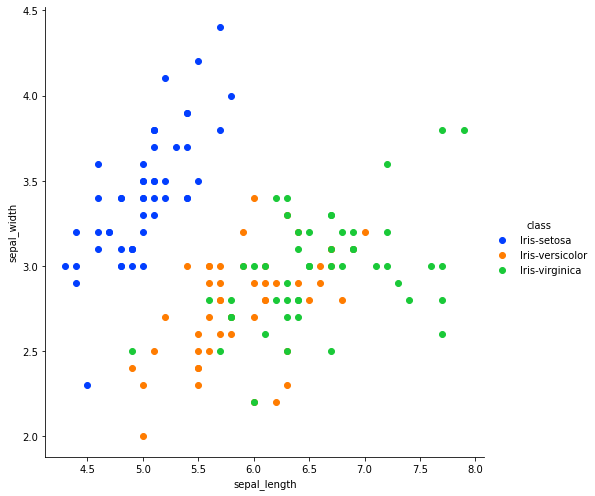

In [188]:
iris = pd.read_csv("data/iris.data", sep=",")
iris_X = iris.drop(columns=['class']).to_numpy()
iris_y = iris['class'].to_numpy()
plotDataset(iris, 'class')

In [189]:
print('***** Iris Dataset *****')
compareNB(iris_X, iris_y)

***** Iris Dataset *****
===== GaussianNB without smoothing =====
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
===== GaussianNB with smoothing =====
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
===== MultinomialNB without smoothing =====
Accuracy: 0.6
Precision: 0.4598
Recall: 0.6667
F1 score: 0.5167
===== MultinomialNB with smoothing ====
Accuracy: 0.6
Precision: 0.4598
Recall: 0.6667
F1 score: 0.5167


In [190]:
print('***** Iris Dataset *****')
compareCV(iris_X, iris_y)

***** Iris Dataset *****
===== GaussianNB without smoothing =====
2-Fold: 0.94
5-Fold: 0.9533
10-Fold: 0.9533
===== GaussianNB with smoothing =====
2-Fold: 0.96
5-Fold: 0.9533
10-Fold: 0.96
===== MultinomialNB without smoothing =====
2-Fold: 0.9466
5-Fold: 0.8195
10-Fold: 0.9066
===== MultinomialNB with smoothing =====
2-Fold: 0.96
5-Fold: 0.9266
10-Fold: 0.8933
===== GaussianNB without smoothing =====
Stratified-2-Fold: 0.9533
Stratified-5-Fold: 0.9533
Stratified-10-Fold: 0.9533
===== GaussianNB with smoothing =====
Stratified-2-Fold: 0.9466
Stratified-5-Fold: 0.9533
Stratified-10-Fold: 0.9467
===== MultinomialNB without smoothing =====
Stratified-2-Fold: 0.9533
Stratified-5-Fold: 0.9533
Stratified-10-Fold: 0.9533
===== MultinomialNB with smoothing =====
Stratified-2-Fold: 0.9667
Stratified-5-Fold: 0.96
Stratified-10-Fold: 0.9533


***** Iris Dataset *****
***** Uniform n_bins=25 *****
===== MultinomialNB without smoothing =====
0.7676


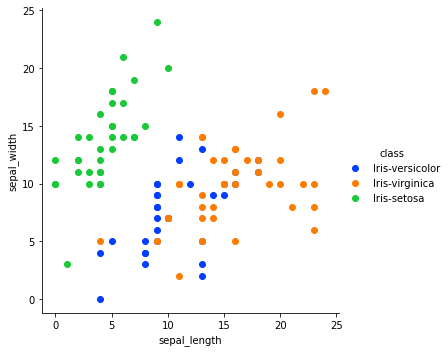

***** Uniform n_bins=50 *****
===== MultinomialNB without smoothing =====
0.7931


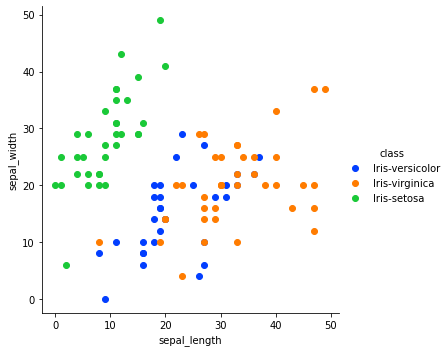

***** Quantile n_bins=25 *****
===== MultinomialNB without smoothing =====
0.8619


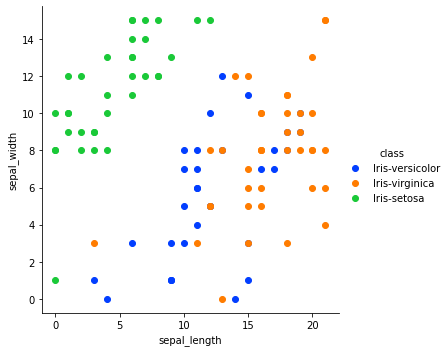

***** Quantile n_bins=50 *****
===== MultinomialNB without smoothing =====
0.8619


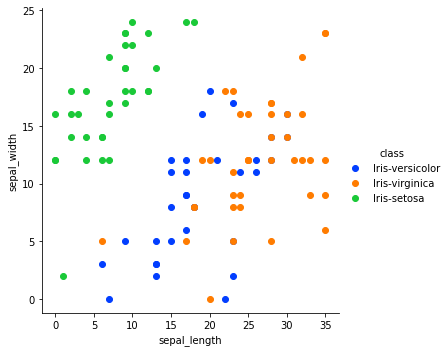

***** Kmeans n_bins=25 *****
===== MultinomialNB without smoothing =====
0.8619


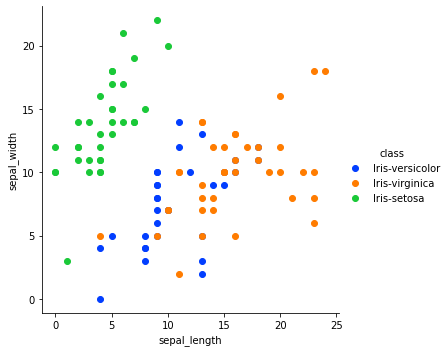

***** Kmeans n_bins=50 *****
===== MultinomialNB without smoothing =====
0.7931


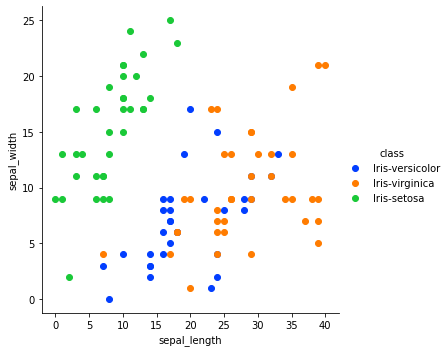

In [191]:
n_bins_1 = 25
n_bins_2 = 50
data = iris
data_X = iris_X
data_y = iris_y

print('***** Iris Dataset *****')
print('***** Uniform n_bins=' + str(n_bins_1) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_1, encode='ordinal', strategy='uniform')
compareDiscretizedNB(data, data_X, data_y, discretizer)
print('***** Uniform n_bins=' + str(n_bins_2) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_2, encode='ordinal', strategy='uniform')
compareDiscretizedNB(data, data_X, data_y, discretizer)

print('***** Quantile n_bins=' + str(n_bins_1) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_1, encode='ordinal', strategy='quantile')
compareDiscretizedNB(data, data_X, data_y, discretizer)
print('***** Quantile n_bins=' + str(n_bins_2) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_2, encode='ordinal', strategy='quantile')
compareDiscretizedNB(data, data_X, data_y, discretizer)

print('***** Kmeans n_bins=' + str(n_bins_1) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_1, encode='ordinal', strategy='kmeans')
compareDiscretizedNB(data, data_X, data_y, discretizer)
print('***** Kmeans n_bins=' + str(n_bins_2) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_2, encode='ordinal', strategy='kmeans')
compareDiscretizedNB(data, data_X, data_y, discretizer)

### Glass

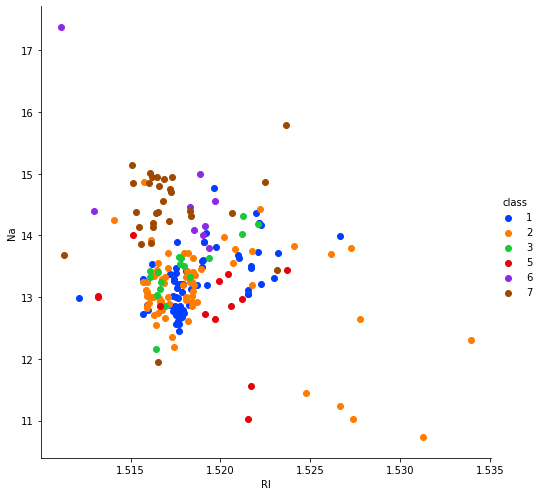

In [192]:
glass = pd.read_csv("data/glass.data", sep=",").drop(columns=['Id'])
glass_X = glass.drop(columns=['class']).to_numpy()
glass_y = glass['class'].to_numpy()
plotDataset(glass, attr='class')

In [193]:
print('***** Glass Dataset *****')
compareNB(glass_X, glass_y)

***** Glass Dataset *****
===== GaussianNB without smoothing =====
Accuracy: 0.0308
Precision: 0.0051
Recall: 0.1667
F1 score: 0.01
===== GaussianNB with smoothing =====
Accuracy: 0.4615
Precision: 0.4055
Recall: 0.4954
F1 score: 0.4097
===== MultinomialNB without smoothing =====
Accuracy: 0.5538
Precision: 0.4674
Recall: 0.4509
F1 score: 0.44
===== MultinomialNB with smoothing ====
Accuracy: 0.4769
Precision: 0.2689
Recall: 0.3419
F1 score: 0.2962


In [194]:
print('***** Glass Dataset *****')
compareCV(glass_X, glass_y)

***** Glass Dataset *****
===== GaussianNB without smoothing =====
2-Fold: 0.0383
5-Fold: 0.0389
10-Fold: 0.0502
===== GaussianNB with smoothing =====
2-Fold: 0.4712
5-Fold: 0.4711
10-Fold: 0.4794
===== MultinomialNB without smoothing =====
2-Fold: 0.3813
5-Fold: 0.3232
10-Fold: 0.3397
===== MultinomialNB with smoothing =====
2-Fold: 0.3259
5-Fold: 0.3221
10-Fold: 0.3118
===== GaussianNB without smoothing =====
Stratified-2-Fold: 0.0359
Stratified-5-Fold: 0.0547
Stratified-10-Fold: 0.0304
===== GaussianNB with smoothing =====
Stratified-2-Fold: 0.5207
Stratified-5-Fold: 0.5299
Stratified-10-Fold: 0.4791
===== MultinomialNB without smoothing =====
Stratified-2-Fold: 0.3398
Stratified-5-Fold: 0.3488
Stratified-10-Fold: 0.354
===== MultinomialNB with smoothing =====
Stratified-2-Fold: 0.3444
Stratified-5-Fold: 0.3628
Stratified-10-Fold: 0.3192


***** Glass Dataset *****
***** Uniform n_bins=25 *****
===== MultinomialNB without smoothing =====
0.5448


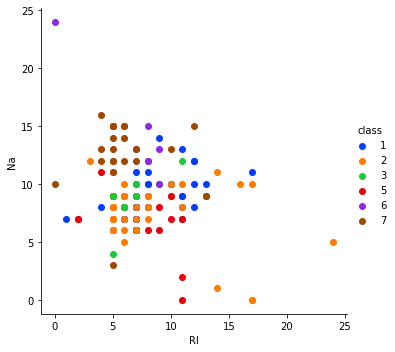

***** Uniform n_bins=50 *****
===== MultinomialNB without smoothing =====
0.6037


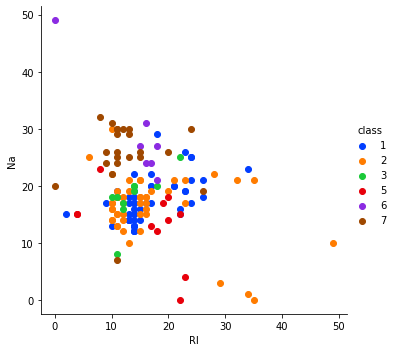

***** Quantile n_bins=25 *****
===== MultinomialNB without smoothing =====
0.508


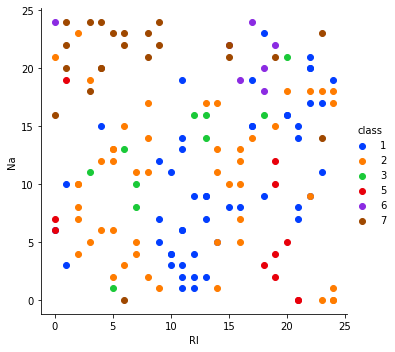

***** Quantile n_bins=50 *****
===== MultinomialNB without smoothing =====
0.4979


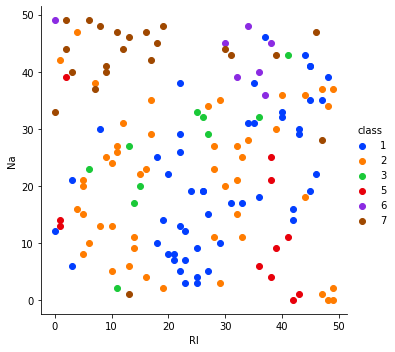

***** Kmeans n_bins=25 *****
===== MultinomialNB without smoothing =====
0.6445


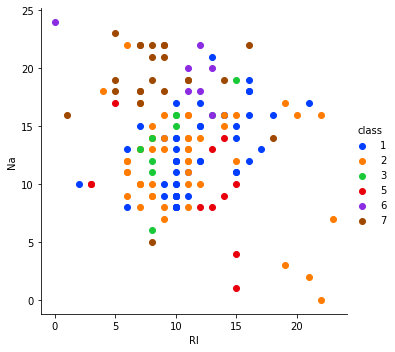

***** Kmeans n_bins=50 *****
===== MultinomialNB without smoothing =====
0.5657


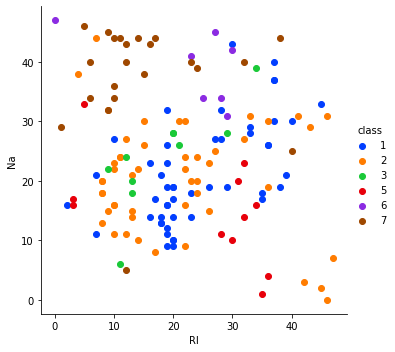

In [195]:
n_bins_1 = 25
n_bins_2 = 50
data = glass
data_X = glass_X
data_y = glass_y

print('***** Glass Dataset *****')
print('***** Uniform n_bins=' + str(n_bins_1) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_1, encode='ordinal', strategy='uniform')
compareDiscretizedNB(data, data_X, data_y, discretizer)
print('***** Uniform n_bins=' + str(n_bins_2) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_2, encode='ordinal', strategy='uniform')
compareDiscretizedNB(data, data_X, data_y, discretizer)

print('***** Quantile n_bins=' + str(n_bins_1) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_1, encode='ordinal', strategy='quantile')
compareDiscretizedNB(data, data_X, data_y, discretizer)
print('***** Quantile n_bins=' + str(n_bins_2) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_2, encode='ordinal', strategy='quantile')
compareDiscretizedNB(data, data_X, data_y, discretizer)

print('***** Kmeans n_bins=' + str(n_bins_1) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_1, encode='ordinal', strategy='kmeans')
compareDiscretizedNB(data, data_X, data_y, discretizer)
print('***** Kmeans n_bins=' + str(n_bins_2) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_2, encode='ordinal', strategy='kmeans')
compareDiscretizedNB(data, data_X, data_y, discretizer)

### Wine

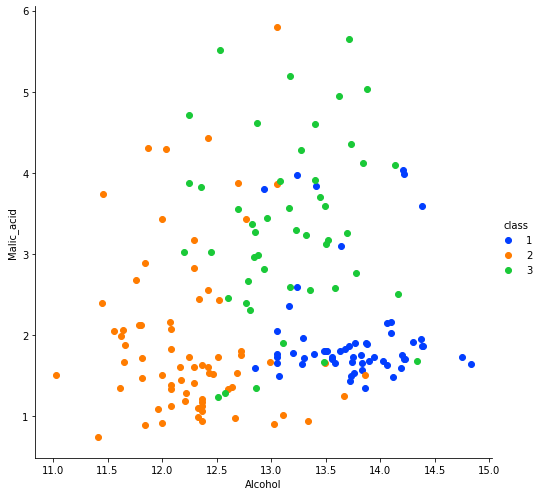

In [196]:
wine = pd.read_csv("data/wine.data", sep=",")
wine_X = wine.drop(columns=['class']).to_numpy()
wine_y = wine['class'].to_numpy()
plotDataset(wine, attr='class')

In [197]:
print('***** Wine Dataset *****')
compareNB(wine_X, wine_y)

***** Wine Dataset *****
===== GaussianNB without smoothing =====
Accuracy: 0.9444
Precision: 0.9444
Recall: 0.9545
F1 score: 0.9466
===== GaussianNB with smoothing =====
Accuracy: 0.9444
Precision: 0.9444
Recall: 0.9545
F1 score: 0.9466
===== MultinomialNB without smoothing =====
Accuracy: 0.8704
Precision: 0.8682
Recall: 0.8682
F1 score: 0.8682
===== MultinomialNB with smoothing ====
Accuracy: 0.8704
Precision: 0.8617
Recall: 0.8682
F1 score: 0.8644


In [198]:
print('***** Wine Dataset *****')
compareCV(wine_X, wine_y)

***** Wine Dataset *****
===== GaussianNB without smoothing =====
2-Fold: 0.9671
5-Fold: 0.989
10-Fold: 0.9723
===== GaussianNB with smoothing =====
2-Fold: 0.978
5-Fold: 0.9775
10-Fold: 0.9781
===== MultinomialNB without smoothing =====
2-Fold: 0.8646
5-Fold: 0.8412
10-Fold: 0.8651
===== MultinomialNB with smoothing =====
2-Fold: 0.8546
5-Fold: 0.8533
10-Fold: 0.8576
===== GaussianNB without smoothing =====
Stratified-2-Fold: 0.9676
Stratified-5-Fold: 0.9833
Stratified-10-Fold: 0.9671
===== GaussianNB with smoothing =====
Stratified-2-Fold: 0.9676
Stratified-5-Fold: 0.9723
Stratified-10-Fold: 0.9781
===== MultinomialNB without smoothing =====
Stratified-2-Fold: 0.8581
Stratified-5-Fold: 0.8474
Stratified-10-Fold: 0.8476
===== MultinomialNB with smoothing =====
Stratified-2-Fold: 0.8387
Stratified-5-Fold: 0.8481
Stratified-10-Fold: 0.8411


***** Wine Dataset *****
***** Uniform n_bins=25 *****
===== MultinomialNB without smoothing =====
0.9187


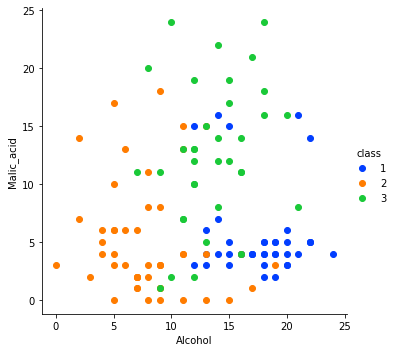

***** Uniform n_bins=50 *****
===== MultinomialNB without smoothing =====
0.9349


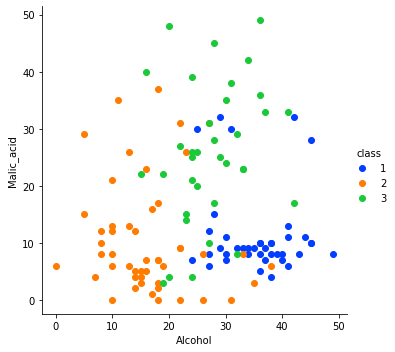

***** Quantile n_bins=25 *****
===== MultinomialNB without smoothing =====
0.9303


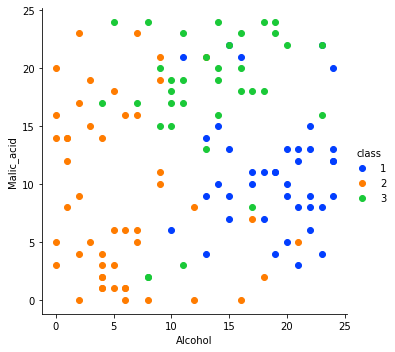

***** Quantile n_bins=50 *****
===== MultinomialNB without smoothing =====
0.9303


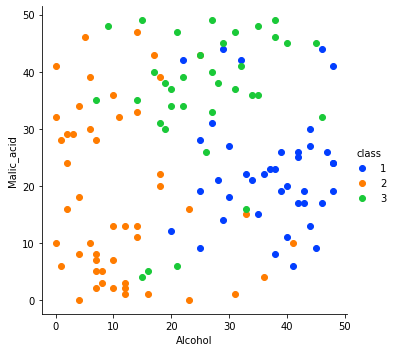

***** Kmeans n_bins=25 *****
===== MultinomialNB without smoothing =====
0.9349


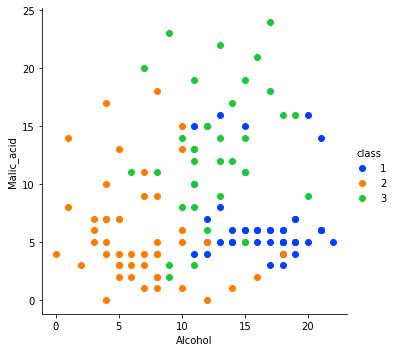

***** Kmeans n_bins=50 *****
===== MultinomialNB without smoothing =====
0.9137


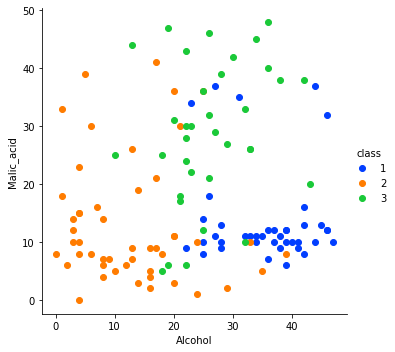

In [199]:
n_bins_1 = 25
n_bins_2 = 50
data = wine
data_X = wine_X
data_y = wine_y

print('***** Wine Dataset *****')
print('***** Uniform n_bins=' + str(n_bins_1) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_1, encode='ordinal', strategy='uniform')
compareDiscretizedNB(data, data_X, data_y, discretizer)
print('***** Uniform n_bins=' + str(n_bins_2) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_2, encode='ordinal', strategy='uniform')
compareDiscretizedNB(data, data_X, data_y, discretizer)

print('***** Quantile n_bins=' + str(n_bins_1) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_1, encode='ordinal', strategy='quantile')
compareDiscretizedNB(data, data_X, data_y, discretizer)
print('***** Quantile n_bins=' + str(n_bins_2) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_2, encode='ordinal', strategy='quantile')
compareDiscretizedNB(data, data_X, data_y, discretizer)

print('***** Kmeans n_bins=' + str(n_bins_1) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_1, encode='ordinal', strategy='kmeans')
compareDiscretizedNB(data, data_X, data_y, discretizer)
print('***** Kmeans n_bins=' + str(n_bins_2) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_2, encode='ordinal', strategy='kmeans')
compareDiscretizedNB(data, data_X, data_y, discretizer)

### Seeds

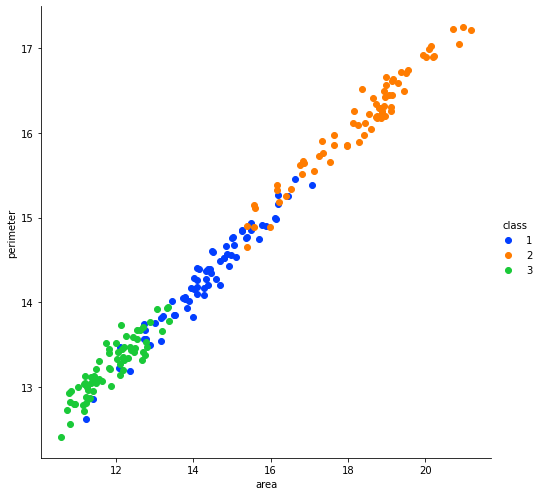

In [200]:
seeds = pd.read_csv("data/seeds_dataset.txt", sep="\t")
seeds_X = seeds.drop(columns=['class']).to_numpy()
seeds_y = seeds['class'].to_numpy()
plotDataset(seeds, attr='class')

In [201]:
print('***** Seeds Dataset *****')
compareNB(seeds_X, seeds_y)

***** Seeds Dataset *****
===== GaussianNB without smoothing =====
Accuracy: 0.8889
Precision: 0.8965
Recall: 0.9032
F1 score: 0.8973
===== GaussianNB with smoothing =====
Accuracy: 0.8889
Precision: 0.8965
Recall: 0.9032
F1 score: 0.8973
===== MultinomialNB without smoothing =====
Accuracy: 0.5238
Precision: 0.6757
Recall: 0.5964
F1 score: 0.4908
===== MultinomialNB with smoothing ====
Accuracy: 0.5238
Precision: 0.6757
Recall: 0.5964
F1 score: 0.4908


In [202]:
print('***** Seeds Dataset *****')
compareCV(seeds_X, seeds_y)

***** Seeds Dataset *****
===== GaussianNB without smoothing =====
2-Fold: 0.9189
5-Fold: 0.9092
10-Fold: 0.9046
===== GaussianNB with smoothing =====
2-Fold: 0.8916
5-Fold: 0.914
10-Fold: 0.8995
===== MultinomialNB without smoothing =====
2-Fold: 0.5534
5-Fold: 0.7463
10-Fold: 0.7651
===== MultinomialNB with smoothing =====
2-Fold: 0.7548
5-Fold: 0.7269
10-Fold: 0.7666
===== GaussianNB without smoothing =====
Stratified-2-Fold: 0.9045
Stratified-5-Fold: 0.9092
Stratified-10-Fold: 0.9045
===== GaussianNB with smoothing =====
Stratified-2-Fold: 0.8995
Stratified-5-Fold: 0.8995
Stratified-10-Fold: 0.9042
===== MultinomialNB without smoothing =====
Stratified-2-Fold: 0.7952
Stratified-5-Fold: 0.7999
Stratified-10-Fold: 0.7853
===== MultinomialNB with smoothing =====
Stratified-2-Fold: 0.8088
Stratified-5-Fold: 0.7755
Stratified-10-Fold: 0.7901


***** Seeds Dataset *****
***** Uniform n_bins=25 *****
===== MultinomialNB without smoothing =====
0.8961


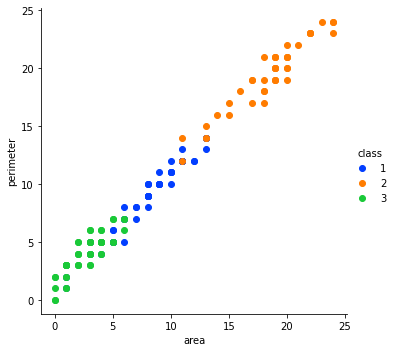

***** Uniform n_bins=50 *****
===== MultinomialNB without smoothing =====
0.8763


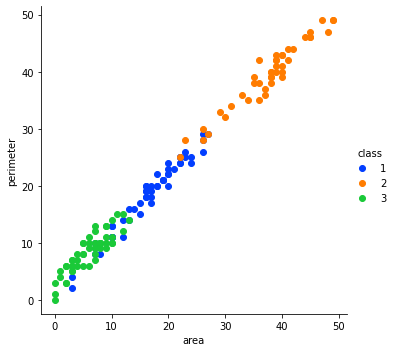

***** Quantile n_bins=25 *****
===== MultinomialNB without smoothing =====
0.8052


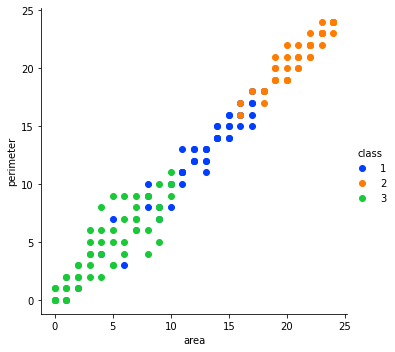

***** Quantile n_bins=50 *****
===== MultinomialNB without smoothing =====
0.8235


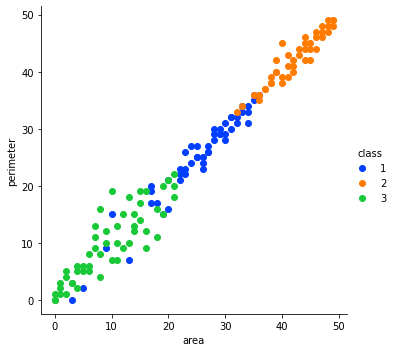

***** Kmeans n_bins=25 *****
===== MultinomialNB without smoothing =====
0.8961


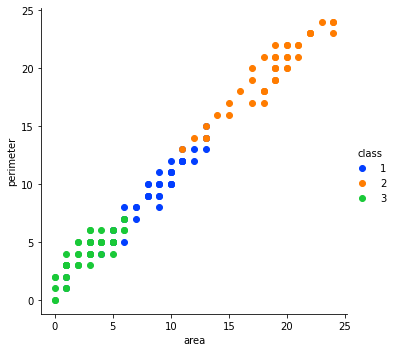

***** Kmeans n_bins=50 *****
===== MultinomialNB without smoothing =====
0.8763


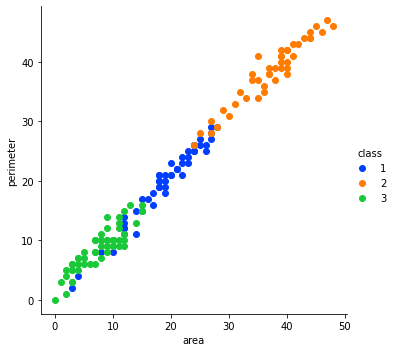

In [203]:
n_bins_1 = 25
n_bins_2 = 50
data = seeds
data_X = seeds_X
data_y = seeds_y

print('***** Seeds Dataset *****')
print('***** Uniform n_bins=' + str(n_bins_1) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_1, encode='ordinal', strategy='uniform')
compareDiscretizedNB(data, data_X, data_y, discretizer)
print('***** Uniform n_bins=' + str(n_bins_2) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_2, encode='ordinal', strategy='uniform')
compareDiscretizedNB(data, data_X, data_y, discretizer)

print('***** Quantile n_bins=' + str(n_bins_1) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_1, encode='ordinal', strategy='quantile')
compareDiscretizedNB(data, data_X, data_y, discretizer)
print('***** Quantile n_bins=' + str(n_bins_2) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_2, encode='ordinal', strategy='quantile')
compareDiscretizedNB(data, data_X, data_y, discretizer)

print('***** Kmeans n_bins=' + str(n_bins_1) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_1, encode='ordinal', strategy='kmeans')
compareDiscretizedNB(data, data_X, data_y, discretizer)
print('***** Kmeans n_bins=' + str(n_bins_2) + ' *****')
discretizer = KBinsDiscretizer(n_bins=n_bins_2, encode='ordinal', strategy='kmeans')
compareDiscretizedNB(data, data_X, data_y, discretizer)